In [1]:
%load_ext autoreload
%autoreload 2

In [128]:
import os, sys, time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from game_browser import CoinGameBrowser
from gym.utils.env_checker import check_env
from IPython.display import clear_output

In [215]:
if 'g' in locals():
    driver = g.driver
    g = CoinGameBrowser(driver=driver)
else:
    g = CoinGameBrowser()
    driver = g.driver

SC time  0.228
OCR time 0.562
diff heads: 0, diff_tails: 0, diff_score: 1, diff_flips_left: -15
SC time  0.168
OCR time 0.404
diff heads: 0, diff_tails: 0, diff_score: 1, diff_flips_left: -15
SC time  0.169
OCR time 0.421
diff heads: 0, diff_tails: 0, diff_score: 1, diff_flips_left: -15


In [216]:
g._update_data()
g.heads, g.tails, g.score, g.flips_left, g.done

SC time  0.213
OCR time 0.481


(0, 0, 1, 85, False)

In [223]:
g.toggle_show_flipping_animations()

In [236]:
g.reset()

SC time  0.169
OCR time 0.425
diff heads: 0, diff_tails: 0, diff_score: -4, diff_flips_left: 91
SC time  0.166
OCR time 0.393
diff heads: 0, diff_tails: 0, diff_score: -4, diff_flips_left: 91
SC time  0.159
OCR time 0.381
diff heads: 0, diff_tails: 0, diff_score: -4, diff_flips_left: 91


(0, 0, 100)

In [242]:
g.step(0)

((0, 1, 110), -1, False, {'score': 1})

In [250]:
for _ in range(3):
    print(g.step(0))

SC time  0.206
OCR time 0.487
((23, 1, 43), -1, False, {'score': 1})
SC time  0.179
OCR time 0.426
((24, 1, 42), -1, False, {'score': 1})
SC time  0.178
OCR time 0.500
((25, 1, 41), -1, False, {'score': 1})


In [245]:
g.label_fair()

SC time  0.154
OCR time 0.425
diff heads: 0, diff_tails: -1, diff_score: 0, diff_flips_left: -20
SC time  0.217
OCR time 0.641
diff heads: 0, diff_tails: -1, diff_score: 0, diff_flips_left: -27
SC time  0.169
OCR time 0.522
diff heads: 0, diff_tails: -1, diff_score: 0, diff_flips_left: -27


In [230]:
g.label_cheater()

SC time  0.187
OCR time 0.443


In [213]:
g.reset_game()

L
Score: 1 85 Flips left



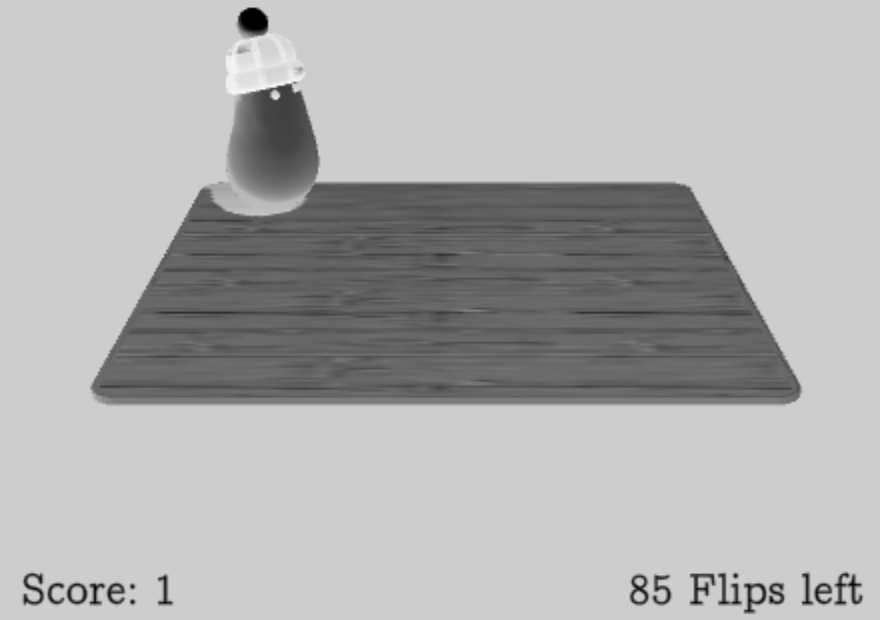

In [214]:
from PIL import Image
import numpy as np
screenshot = g.get_page_screenshot()
crop = screenshot.crop((100, 800, 980, 1420))
text = CoinGameBrowser._get_image_text(crop, lang='eng', config="--psm 6 --oem 3")
print(text)
crop

In [137]:
%%timeit 
text = CoinGameBrowser._get_image_text(crop)#, config="--oem 3")

359 ms ± 77.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [138]:
print(text)

Score: 3 37 Flips left



In [ ]:
import random
try:
    for i in range(1):
        if g.done:
            (n_heads, n_tails, flips_left) = g.reset()
        done = False
        while not done:
            action = random.choice([0, 1, 2, 3])
            (n_heads, n_tails, flips_left), reward, done, info = g.step(action)
            score = info["score"]
            print(f'{score=}, {flips_left=}, {n_heads=}, {n_tails=}, {action=}, {reward=}   ')
except Exception as e:
    print(e)